# Projet 5  : Detection d'image - YoloV3 


In [0]:
!git clone https://github.com/zzh8829/yolov3-tf2
!pip install -r requirements-gpu.txt

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 341, done.
remote: Total 341 (delta 0), reused 0 (delta 0), pack-reused 341
Receiving objects: 100% (341/341), 4.16 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (198/198), done.
/content/yolov3-tf2
Obtaining file:///content/yolov3-tf2 (from -r requirements-gpu.txt (line 6))
     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 28.7MB 117kB/s 
     |████████████████████████████████| 3.9MB 45.4MB/s 
     |████████████████████████████████| 450kB 48.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ca8a42a52aaf237fb2cb509715ebb1bb3fb1d38ab9215b30bc35d8f4b15961e4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.

##### 2.  Check Tensorflow2 version

In [0]:
%cd yolov3-tf2/
!ls

import tensorflow as tf
tf.__version__

[Errno 2] No such file or directory: 'yolov3-tf2/'
/content/yolov3-tf2
checkpoints	 data		  README.md		train.py
colab_gpu.ipynb  detect.py	  requirements-gpu.txt	yolov3_tf2
conda-cpu.yml	 detect_video.py  requirements.txt	yolov3_tf2.egg-info
conda-gpu.yml	 docs		  setup.py
convert.py	 LICENSE	  tools


'2.1.0'

##### 3.  Convert Pretrained Darknet Weight

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
!python convert.py

--2020-04-19 20:41:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights’

data/yolov3.weights 100%[===================>] 236.52M  3.53MB/s    in 67s     

2020-04-19 20:42:34 (3.51 MB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]

2020-04-19 20:42:36.785210: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-04-19 20:42:36.785313: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or direct

##### 4. Initialize Detector

In [0]:
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs

flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf',
                    'path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')

app._run_init(['yolov3'], app.parse_flags_with_usage)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

##### 4. Detect Image

I0419 20:44:53.954559 140213015558016 <ipython-input-7-eeba612a7075>:9] weights loaded
I0419 20:44:53.956181 140213015558016 <ipython-input-7-eeba612a7075>:12] classes loaded
I0419 20:44:54.247684 140213015558016 <ipython-input-7-eeba612a7075>:23] time: 0.20905590057373047
I0419 20:44:54.248502 140213015558016 <ipython-input-7-eeba612a7075>:25] detections:
I0419 20:44:54.255813 140213015558016 <ipython-input-7-eeba612a7075>:29] 	laptop, 0.9988924264907837, [0.4913143  0.34266388 0.8616111  0.6565379 ]
I0419 20:44:54.260216 140213015558016 <ipython-input-7-eeba612a7075>:29] 	laptop, 0.9988393187522888, [0.27520797 0.31843174 0.530409   0.59256387]
I0419 20:44:54.264369 140213015558016 <ipython-input-7-eeba612a7075>:29] 	tvmonitor, 0.9953662157058716, [0.03926121 0.05930761 0.24610764 0.2723019 ]
I0419 20:44:54.268715 140213015558016 <ipython-input-7-eeba612a7075>:29] 	cell phone, 0.7568874359130859, [0.24115872 0.58390296 0.33177286 0.63136125]
I0419 20:44:54.272956 140213015558016 <ipy

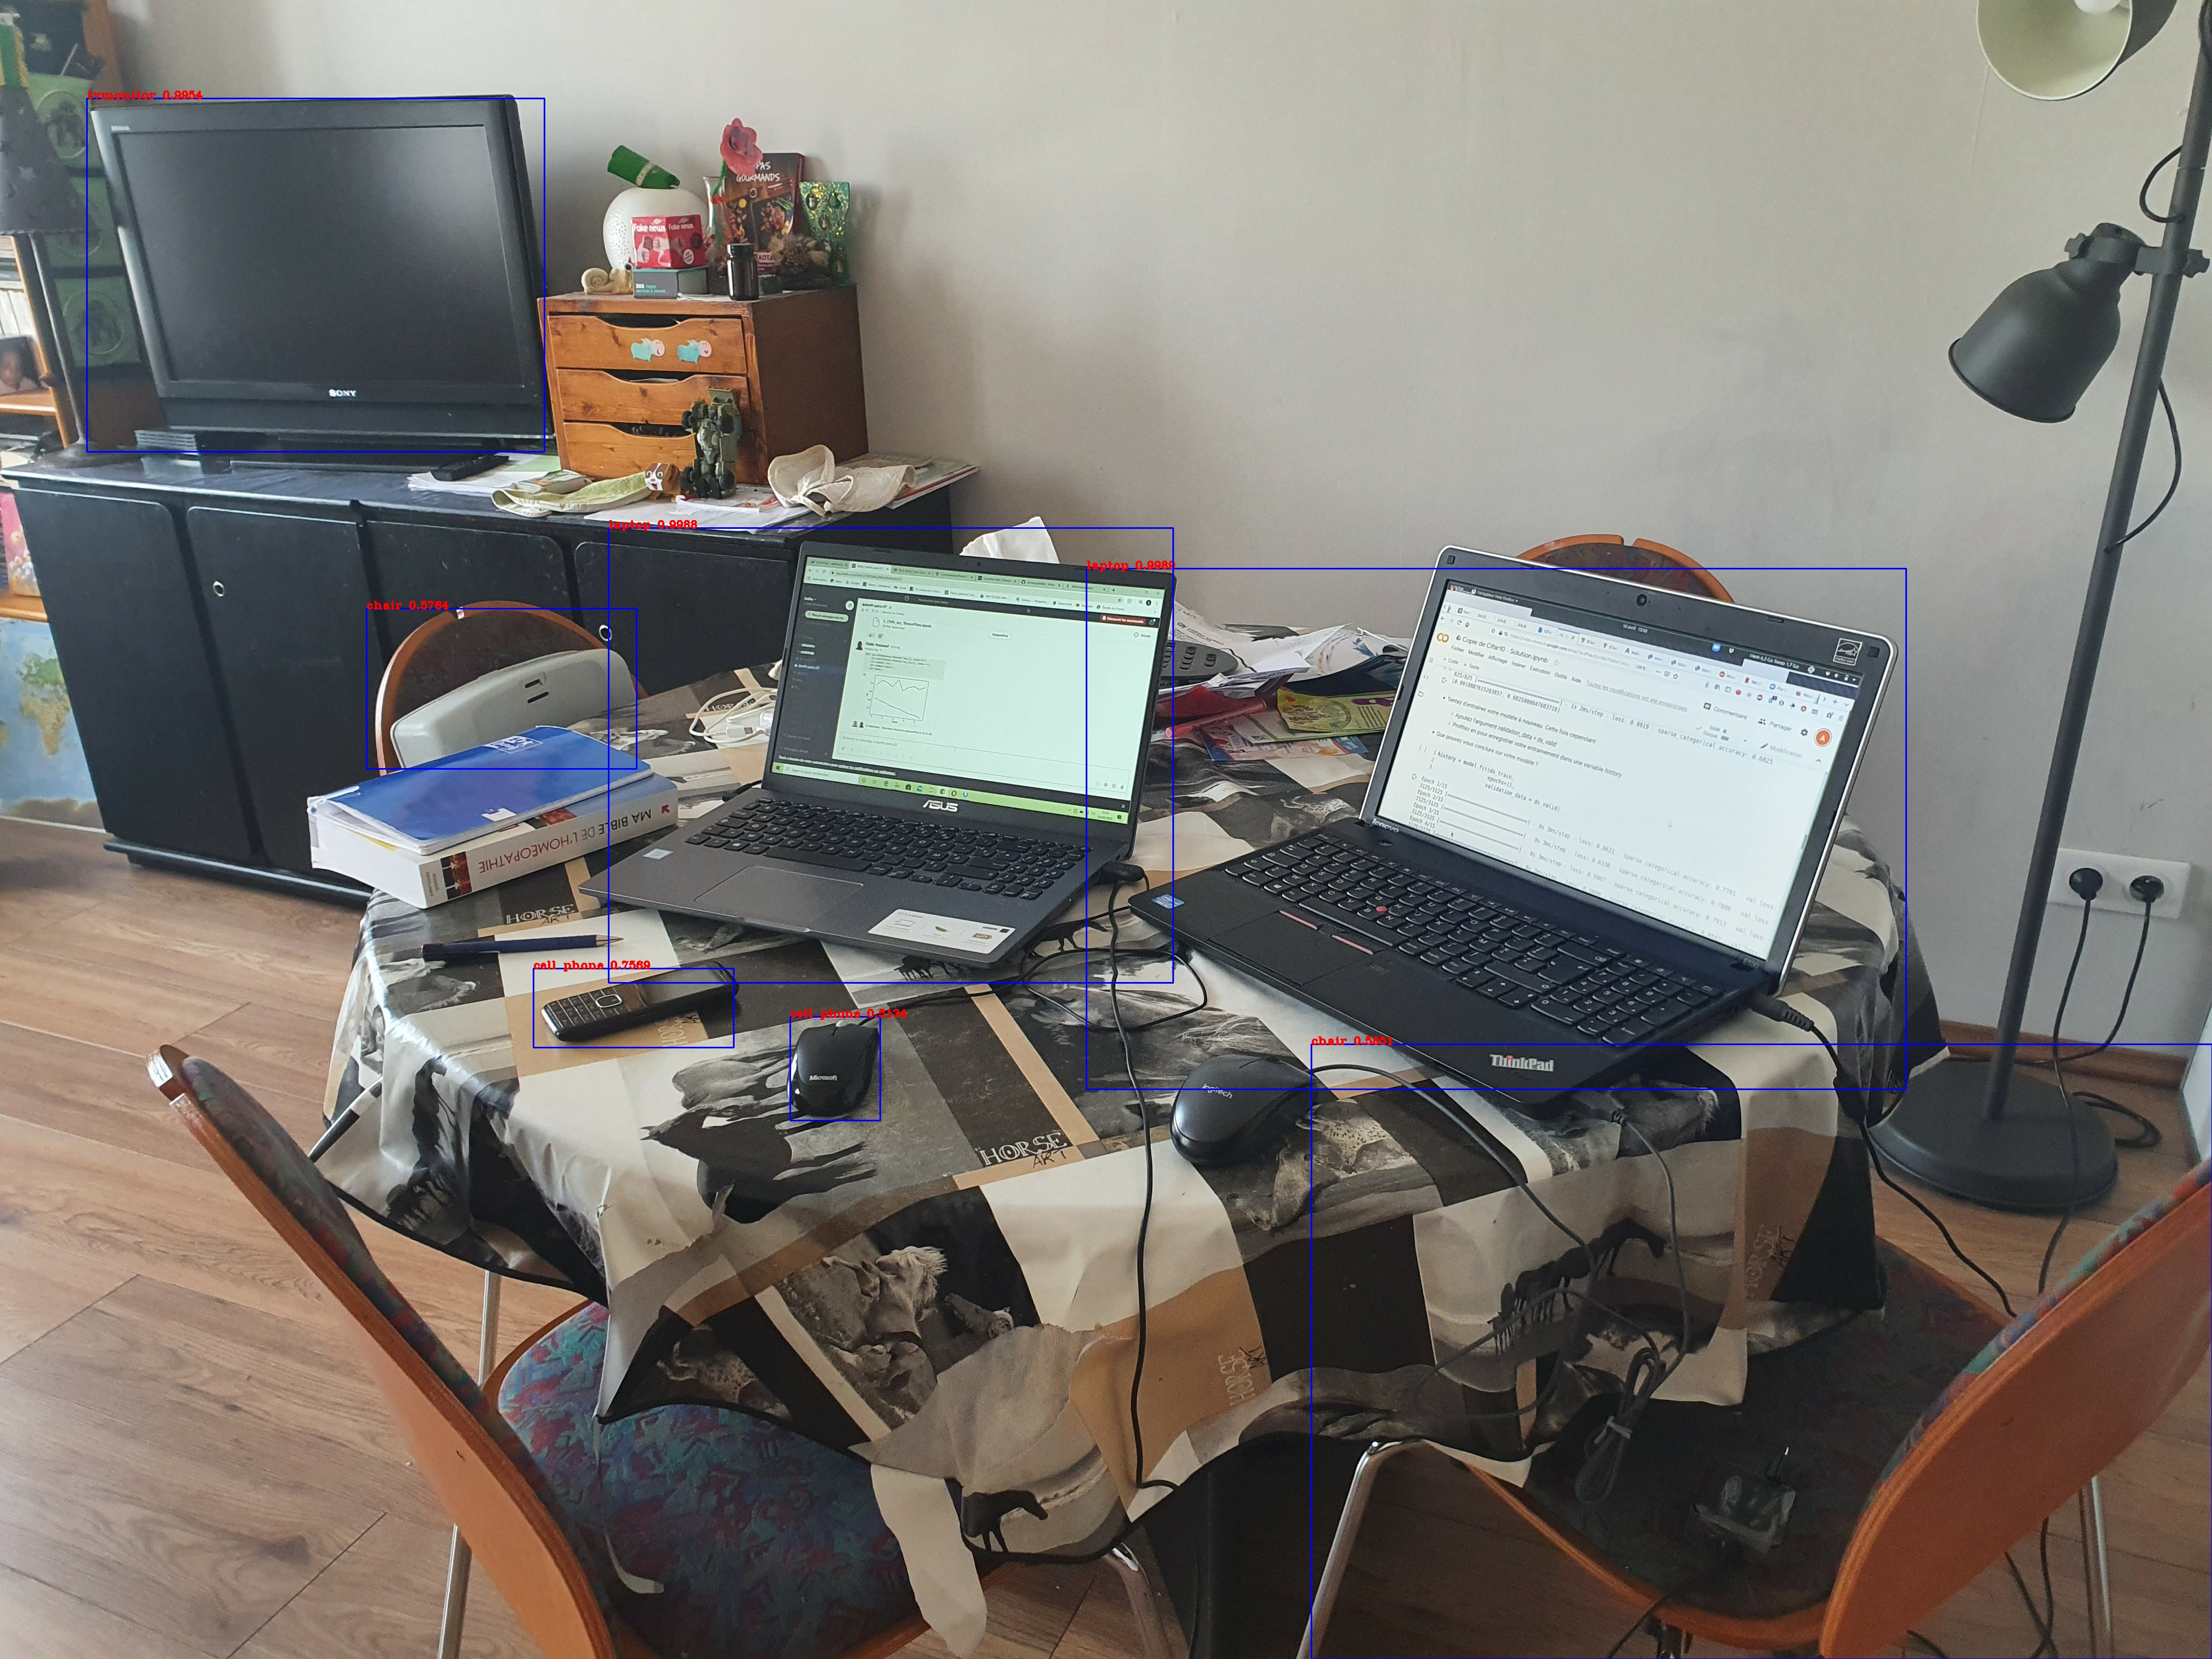

In [0]:
FLAGS.image = 'data/home.jpg'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

from IPython.display import Image, display
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

I0419 20:46:30.019775 140213015558016 <ipython-input-8-52a4da5b21b0>:9] weights loaded
I0419 20:46:30.024010 140213015558016 <ipython-input-8-52a4da5b21b0>:12] classes loaded
I0419 20:46:30.280017 140213015558016 <ipython-input-8-52a4da5b21b0>:23] time: 0.2168900966644287
I0419 20:46:30.280792 140213015558016 <ipython-input-8-52a4da5b21b0>:25] detections:
I0419 20:46:30.287929 140213015558016 <ipython-input-8-52a4da5b21b0>:29] 	person, 0.9992431402206421, [0.23226097 0.15683717 0.7059063  0.79155195]
I0419 20:46:30.292269 140213015558016 <ipython-input-8-52a4da5b21b0>:29] 	chair, 0.9709144234657288, [0.8350464  0.4232136  0.998343   0.69146013]
I0419 20:46:30.296505 140213015558016 <ipython-input-8-52a4da5b21b0>:29] 	tvmonitor, 0.9629195928573608, [0.        0.4652968 0.2650786 0.9455542]
I0419 20:46:30.300779 140213015558016 <ipython-input-8-52a4da5b21b0>:29] 	keyboard, 0.8196271061897278, [0.11075756 0.86174816 0.3959082  0.95269424]
I0419 20:46:30.305320 140213015558016 <ipython-inp

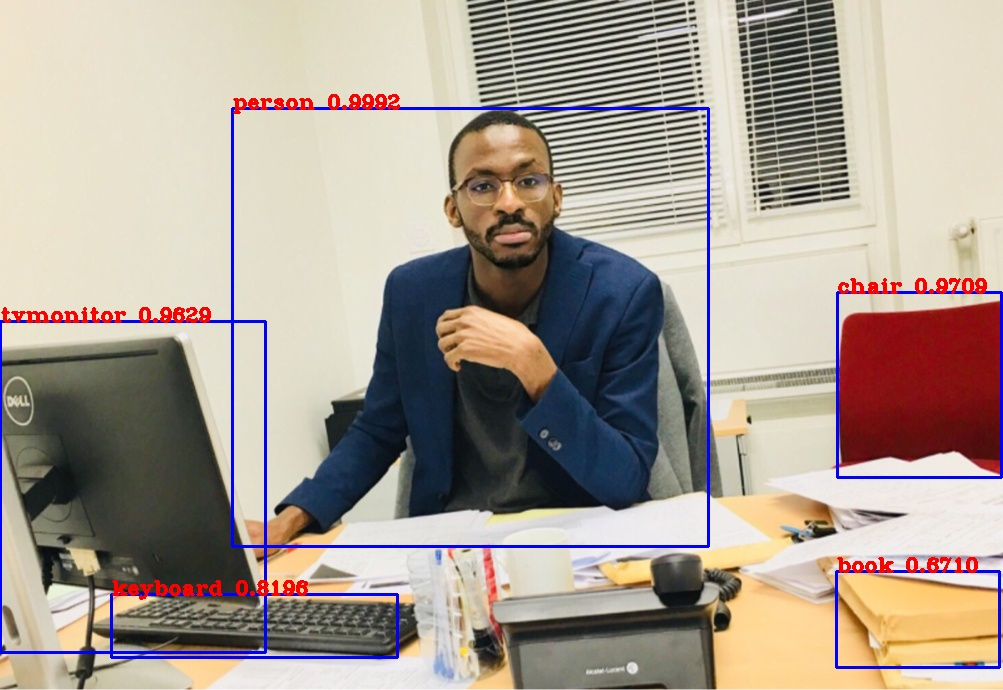

In [0]:
FLAGS.image = 'data/ab.jpg'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

from IPython.display import Image, display
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))